# 案例：几何形状的识别与测量

<br><br>在本案例中，我们用 OpenCV 来对图片中的几何形状进行识别与测量,包括判断几何形状的类型和颜色,测量其周长,面积,如下图。

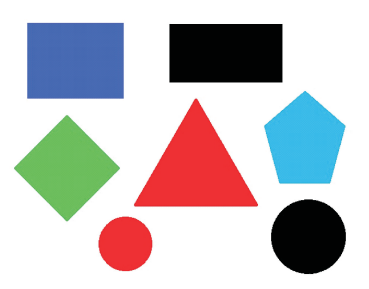

## 1.轮廓(contours)

什么是轮廓,简单说**轮廓**就是一些列点相连组成形状、它们拥有同样的颜色、轮廓发现在图像的对象分析、对象检测等方面是非常有用的在 OpenCV 中使用轮廓发现相关函数时候要求输入图像是二值图像,这样便于轮廓提取、边缘提取等操作。轮廓发现的函数与参数解释如下:

findContours(image,mode,method,contours=None,hierarchy=None,offset=None)

<ul><li>
image输入/输出的二值图像</li>
<li>mode返回回轮廓的结构、可以是List、Tree、External</li>
<li>method轮廓点的编码方式,基本是基于链式编码</li>
<li>contours迒回的轮廓集合</li>
<li>hieracrchy迒回的轮廓层次关系</li>
<li>offset点是否有位移
    </li></ul>

## 2.多边形逼近

**多边形逼近**,是通过对轮廓外形无限逼近,删除非关键点、得到轮廓的关键点,不断逼近轮廓真实形状的方法,OpenCV 中多边形逼近的函数与参数解释如下:

approxPolyDP(curve,epsilon,closed,approxCurve=None)
<ul><li>
curve表示输入的轮廓点集合</li>
<li>epsilon表示逼近曲率,越小表示相似逼近越厉害</li>
<li>close是否闭合
</li></ul>

## 3.图像几何矩

**图像几何矩**是一种用于描述图像形状特征的数学量，是图像的几何特征。它可以用于图像识别、目标跟踪、图像分类等应用中。
 
图像几何矩可以分为一阶矩、二阶矩和高阶矩。其中一阶矩包括图像的重心和面积，二阶矩包括图像的惯性矩和偏心率，高阶矩则可以用于描述图像的细节特征。
 
图像几何矩的计算通常基于图像像素的灰度值。对于灰度图像，每个像素的灰度值可以看作是一个点的坐标，通过对图像中所有像素的灰度值进行积分，可以得到图像的几何矩。
 
图像几何矩具有平移、旋转和尺度不变性，因此可以用于图像的匹配和识别。在实际应用中，图像几何矩通常与其他图像特征（如纹理、颜色等）结合使用，以提高图像识别的准确性。

这里我们通过计算一阶几何距得到指定轮廓的中心位置，计算几何距的函数与参数解释如下:

moments(array,binaryImage=None)
    <ul><li>array表示指定输入轮廓</li>
<li>binaryImage默认为None</li></ul>

moments函数的返回值是矩特征，主要包括：
<ul><li>
空间矩，零阶矩 m00 ，一阶矩：m10, m01，二阶矩：m20, m11, m02，三阶矩：m30, m21, m12, m03
<li>中心矩，二阶中心矩：mu20, mu11, mu02，三阶中心矩：mu30, mu21, mu12, mu03</li>
<li>归一化中心矩，二阶 Hu 矩：nu20, nu11, nu02，三阶 Hu 矩：nu30, nu21, nu12, nu03
</li></ul>

矩特征包含了对应对象不同类型的集合特征，例如大小，位置，角度，形状等，矩特征广泛应用在模式识别，图像识别方面。

In [1]:
import cv2 as cv
import numpy as np

In [2]:
def draw_text_info(image):
    global shapes
    c1=shapes['triangle']
    c2=shapes['rectangle']
    c3=shapes['polygons']
    c4=shapes['circles']
    cv.putText(image,"triangle:"+str(c1),(10,20),cv.FONT_HERSHEY_PLAIN,1.2,(255,0,0),1)
    cv.putText(image,"rectangle:"+str(c2),(10,40),cv.FONT_HERSHEY_PLAIN,1.2,(255,0,0),1)
    cv.putText(image,"polygons:"+str(c3),(10,60),cv.FONT_HERSHEY_PLAIN,1.2,(255,0,0),1)
    cv.putText(image,"circles:"+str(c4),(10,80),cv.FONT_HERSHEY_PLAIN,1.2,(255,0,0),1)
    return image

In [3]:
src=cv.imread("./geometry.png")
result=np.zeros(src.shape,dtype=np.uint8)
result.fill(120)
gray=cv.cvtColor(src,cv.COLOR_BGR2GRAY)
ret,binary=cv.threshold(gray,0,255,cv.THRESH_BINARY_INV|cv.THRESH_OTSU)
contours,hierarchy=cv.findContours(binary,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
shapes={'triangle':0,'rectangle':0,'polygons':0,'circles':0}

for cnt in range(len(contours)):
    cv.drawContours(result,contours,cnt,(0,255,0),2)
    epsilon=0.01 * cv.arcLength(contours[cnt],True)
    approx=cv.approxPolyDP(contours[cnt],epsilon,True)
    corners=len(approx)
    shape_type=""
    if corners==3:
        count=shapes['triangle']
        count=count+1
        shapes['triangle']=count
        shape_type="三角形"
    if corners==4:
        count=shapes['rectangle']
        count=count+1
        shapes['rectangle']=count
        shape_type="矩形"
    if corners>=10:
        count=shapes['circles']
        count=count+1
        shapes['circles']=count
        shape_type="圆形"
    if 4 < corners< 10:
        count=shapes['polygons']
        count=count+1
        shapes['polygons']=count
        shape_type="多边形"
    mm=cv.moments(contours[cnt])
    cx=int(mm['m10']/mm['m00'])
    cy=int(mm['m01']/mm['m00'])
    cv.circle(result,(cx,cy),3,(0,0,255),-1)
    color=src[cy][cx]
    color_str="("+str(color[0])+","+str(color[1])+","+str(color[2])+")"
    p=cv.arcLength(contours[cnt],True)
    area=cv.contourArea(contours[cnt])
    print("周长:%.3f,面积:%.3f颜色:%s形状:%s"% (p,area,color_str,shape_type))
    
cv.imshow("AnalysisResult",draw_text_info(result))
cv.waitKey()
cv.destroyAllWindows()

周长:175.439,面积:2220.500颜色:(52,48,238)形状:圆形
周长:245.622,面积:4316.000颜色:(2,2,1)形状:圆形
周长:303.186,面积:5544.000颜色:(92,189,108)形状:矩形
周长:387.948,面积:6787.500颜色:(52,48,238)形状:三角形
周长:284.350,面积:5046.500颜色:(233,186,57)形状:多边形
周长:340.828,面积:6553.000颜色:(2,2,1)形状:矩形
周长:340.828,面积:7199.000颜色:(178,105,70)形状:矩形
